# [Bitcoin Price Prediction - Group 44]

Group Members:
Arda Güney, Ahmet Yavuz Lülecioğu, Ata Ernam, Burak Kurtulmuş



## Introduction

Bitcoin is currently one of the most well-known cryptocurrencies. It is a decentralized digital currency that was created by Satoshi Nakamoto in 2008 and has since evolved into a mechanism to conduct banking transactions without the use of intermediaries by utilizing the blockchain. It had a significant impact on banking and finance. Bitcoin's value was virtually zero dollars when it was originally published in 2009, but when its potential was realized, its value skyrocketed. One bitcoin is currently valued at roughly 38 thousand dollars.

Our group recognizes bitcoin's potential and believes that its value will continue to rise in the long run. As a result, our goal is to analyze and visualize the bitcoin data that has been provided in order to gain a better knowledge of bitcoin and its tendencies. With this project, we hope to make it simple for everyone to comprehend pricing trends over time and make smarter investment decisions.


### Utilized Datasets

https://www.kaggle.com/code/igfelgomes/prevendo-pre-o-bitcoin/data

https://www.kaggle.com/c/bitcoin/data

https://www.kaggle.com/mczielinski/bitcoin-historical-data

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

https://www.kaggle.com/prasoonkottarathil/btcinusd


In [ ]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [ ]:
!ls drive

MyDrive  Othercomputers  Shareddrives


In [ ]:
from os.path import join

path_prefix = "./drive/MyDrive"
fname = "BTC-USD.csv"

df=pd.read_csv(join(path_prefix, fname))


## Processing and analyzing the dataset details


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2.730000e+03
mean,11487.678052,11796.044833,11146.706850,11499.966454,11499.966454,1.477502e+10
...,...,...,...,...,...,...
75%,10594.882078,10873.875245,10292.364993,10603.081055,10603.081055,2.477871e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [ ]:
df.shape

(2730, 7)

In [ ]:
# Checking datatypes
df.dtypes

Date          object
Open         float64
              ...   
Adj Close    float64
Volume       float64
Length: 7, dtype: object

In [ ]:
# Converting the "Date" column to Datetime for easier use
df["Date"] = pd.to_datetime(df["Date"])

#Checking data types
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
# Checking for nan values
df.isna().sum()
# For this dataset since there is no nan values, we don't need to do data cleaning
# Therefore start with Exploratory Data Analysis directly

Date         0
Open         0
            ..
Adj Close    0
Volume       0
Length: 7, dtype: int64

## Exploratory Data Analysis

```
- Visualization of descriptive statistics of the dataset
- Visualization of each feature separately based on time series
- Analysis of the highest and lowest price of all time with respect to volume
- Analyzing how high & low prices change with respect to time
- Comparison of open, close, high and low prices for selected time range and/or volume
```



## Visualization of descriptive statistics of the dataset

In this section, by using the dataset (https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory),  some financial attributes of Bitcoin is plotted with respect to time and volume. The dataset contains information about high price, low price, opening price, closing price and market cap daily. The time interval of these informations is 29.04.2013-06.07.2021.

In [ ]:
from os.path import join
from google.colab import drive

drive.mount('./drive', force_remount=True)
path_prefix = './drive/My Drive'
pd.set_option('max_rows', 5)

%matplotlib inline
fname = "coin_Bitcoin.csv"

df=pd.read_csv(join(path_prefix, fname))

df.head()


Mounted at ./drive


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.strftime("%Y")

df["Year"].head()


0    2013
1    2013
2    2013
3    2013
4    2013
Name: Year, dtype: object

In [ ]:
df["Year"].describe()

count     2991
unique       9
top       2016
freq       366
Name: Year, dtype: object

In [ ]:
df[["High","Low","Date"]]
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")
df[["High","Low","Date"]].head()

,High,Low,Date
0,147.488007,134.000000,2013-04-29
1,146.929993,134.050003,2013-04-30
2,139.889999,107.720001,2013-05-01
3,125.599998,92.281898,2013-05-02
4,108.127998,79.099998,2013-05-03


**Distribution of daily high prices of BTC by date.**

In [ ]:
ax = df[["High","Date"]].plot.scatter(x = "Date", y = "High", s=1)

ax.set_title("High Price Distribution by Date")
ax.set_xlabel("Date")
plt.show()


**Distribution of daily low prices of BTC by date**

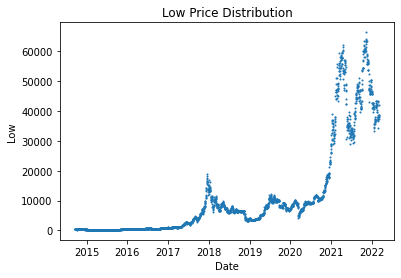

In [ ]:
ax = df[["Low", "Date"]].plot.scatter(x = "Date", y = "Low", s = 1)

ax.set_title("Low Price Distribution")
ax.set_xlabel("Date")
plt.show()

**Distribution of daily market cap of BTC by date.**

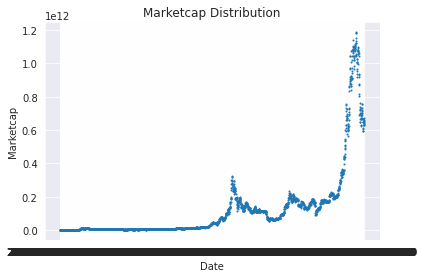

In [ ]:
ax = df[["Marketcap", "Date"]].plot.scatter(x = "Date", y = "Marketcap", s = 1)

ax.set_title("Marketcap Distribution")
ax.set_xlabel("Date")
plt.show()

**Distribution of daily opening price of BTC by date.**

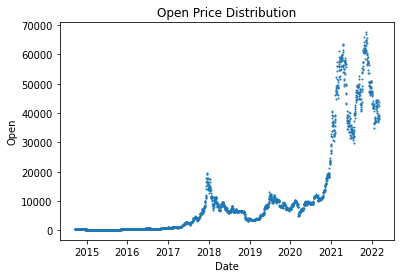

In [ ]:
ax = df[["Open", "Date"]].plot.scatter(x = "Date", y = "Open", s = 1)

ax.set_title("Open Price Distribution")
ax.set_xlabel("Date")
plt.show()

**Distribution of daily closing price of BTC by date.**

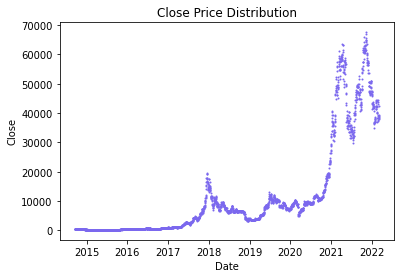

In [ ]:
ax = df[["Close", "Date"]].plot.scatter(x = "Date", y = "Close", s = 1, c = 'mediumslateblue')

ax.set_title("Close Price Distribution")
ax.set_xlabel("Date")
plt.show()

**Distribution of high price of BTC by volume.**

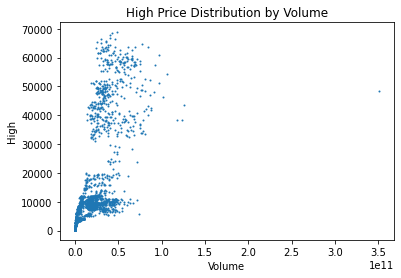

In [ ]:
ax = df[["High","Volume"]].plot.scatter(x = "Volume", y = "High", s=1)

ax.set_title("High Price Distribution by Volume")
ax.set_xlabel("Volume")
plt.show()

**Distribution of low price of BTC by volume.**

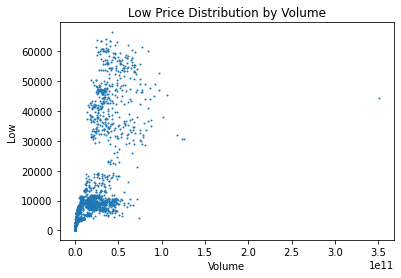

In [ ]:
ax = df[["Low","Volume"]].plot.scatter(x = "Volume", y = "Low", s=1)

ax.set_title("Low Price Distribution by Volume")
ax.set_xlabel("Volume")
plt.show()

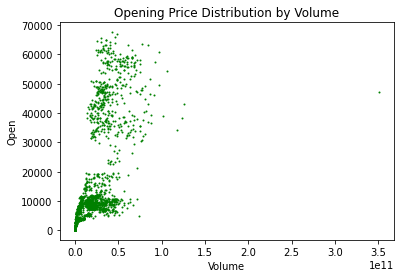

In [ ]:
ax = df[["Open","Volume"]].plot.scatter(x = "Volume", y = "Open", s=1, c = 'g')

ax.set_title("Opening Price Distribution by Volume")
ax.set_xlabel("Volume")
plt.show()

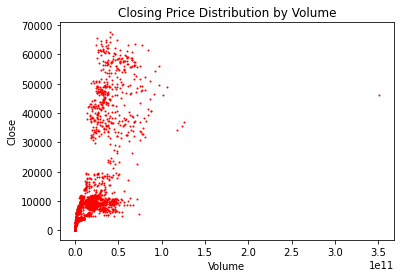

In [ ]:
ax = df[["Close","Volume"]].plot.scatter(x = "Volume", y = "Close", s=1, c = 'r')

ax.set_title("Closing Price Distribution by Volume")
ax.set_xlabel("Volume")
plt.show()

### Comparison of Distributions Of Volumes For Different Open/Close Prices

In this section, by using https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing and using various data groups, we compared volume, open and close prices. We examined the distribution of the relationship between open and volume, one of these groups, graphically. We applied the same to the graph between close and volume. Finally, we had the opportunity to see the distribution of these groups collectively using seaborn.



In [ ]:
# The attiributes from the dataset we will be using for this section
df[["Open","Close","Volume"]]
df[["Open","Close","Volume"]].tail()

,Open,Close,Volume
2725,42458.14063,39137.60547,2.851627e+10
2726,39148.44922,39400.58594,1.697592e+10
2727,39404.19922,38419.98438,1.974523e+10
2728,38429.30469,38062.03906,2.854614e+10
2729,38059.90234,38737.26953,2.577658e+10


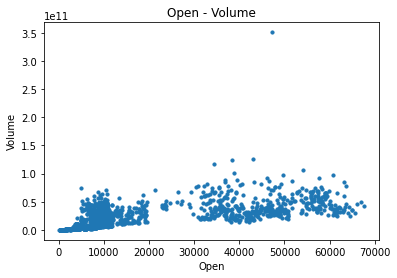

In [ ]:
# Comparing distributions of the volumes for different open prices
ax = df[["Open", "Volume"]].plot.scatter(x="Open", y="Volume", s=10)  # s-> marker size
ax.set_title("Open - Volume")
plt.show()

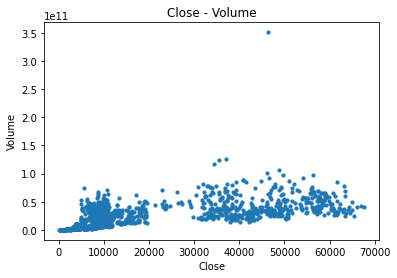

In [ ]:
# Comparing distributions of the volumes for different close prices
ax = df[["Close", "Volume"]].plot.scatter(x="Close", y="Volume", s=10)  # s-> marker size
ax.set_title("Close - Volume")
plt.show()

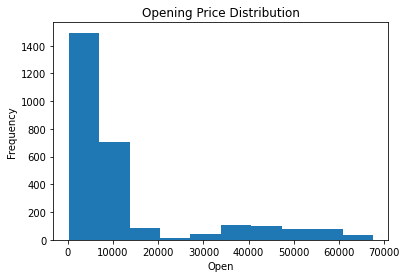

In [ ]:
# histogram of the opening price column
# extracting the column as a series object
# and then calling the plot.hist function
ax = df["Open"].plot.hist()

ax.set_title("Opening Price Distribution")
ax.set_xlabel("Open")
plt.show()

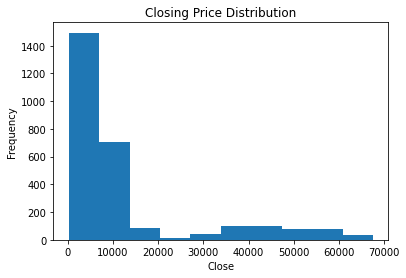

In [ ]:
# histogram of the closing price column
# extracting the column as a series object
# and then calling the plot.hist function
ax = df["Close"].plot.hist()

ax.set_title("Closing Price Distribution")
ax.set_xlabel("Close")
plt.show()

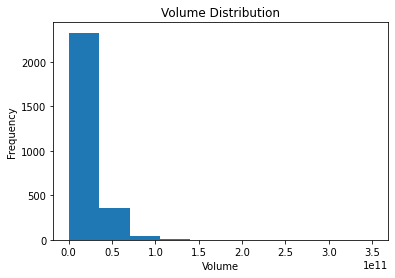

In [ ]:
# histogram of the volume column
# extracting the column as a series object
# and then calling the plot.hist function
ax = df["Volume"].plot.hist()

ax.set_title("Volume Distribution")
ax.set_xlabel("Volume")
plt.show()

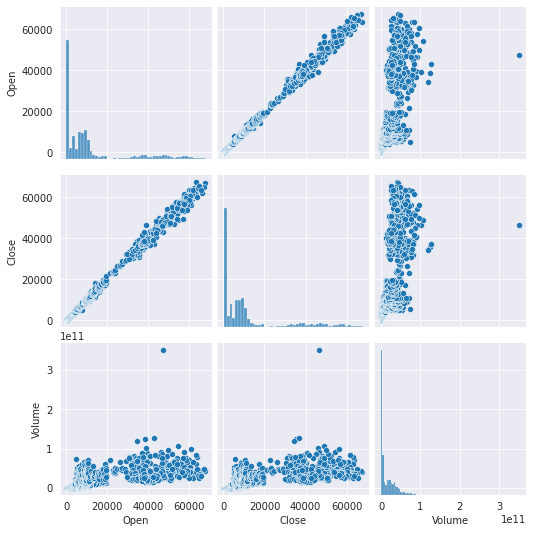

In [ ]:
## A pairplot plots a pairwise relationships in a dataset
## in this way, we can see the relationship
## and distribution of various groups (opening, closing and volume) with each other.

sns.set_style("darkgrid")
path_prefix = "./drive/MyDrive"
fname = "BTC-USD.csv"

df = pd.read_csv(join(path_prefix, fname))
df.head()

sns.pairplot(df[['Open', 'Close', 'Volume']])

##Analysis of High & Low Prices Related to Volume

We used the dataset provided for us in order to analyse the relation of highest and lowest values related to volume.

Link of the dataset used: https://www.kaggle.com/code/igfelgomes/prevendo-pre-o-bitcoin/data

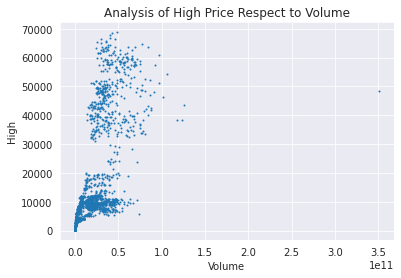

In [ ]:
ax = df[["Volume", "High"]].plot.scatter(x = "Volume", y = "High", s = 1)

ax.set_title("Analysis of High Price Respect to Volume")
#ax.set_xlable("High")
plt.show()

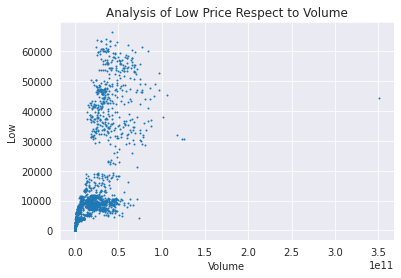

In [ ]:
ax = df[["Volume", "Low"]].plot.scatter(x = "Volume", y = "Low", s = 1)

ax.set_title("Analysis of Low Price Respect to Volume")
#ax.set_xlable("Low")
plt.show()

### Analysis of High & Low Prices Change Respect to Time

We used the datasets provided to us in this part to display the price change of bitcoin over the last eight years, beginning in 2014. To compare the prices, we first produced line plots to represent the peak and low values of the day, then combined the plots.

Link of the dataset used: https://www.kaggle.com/code/igfelgomes/prevendo-pre-o-bitcoin/data

In [ ]:
# The attiributes from the dataset we will be using for this section
df[["High","Low","Date"]]
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")
df[["High","Low","Date"]].head()

,High,Low,Date
0,468.174011,452.421997,2014-09-17
1,456.859985,413.104004,2014-09-18
2,427.834991,384.532013,2014-09-19
3,423.295990,389.882996,2014-09-20
4,412.425995,393.181000,2014-09-21


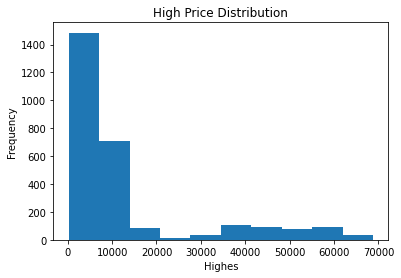

In [ ]:
# histogram of the high price column
# extracting the column as a series object
# and then calling the plot.hist function
ax = df["High"].plot.hist()

ax.set_title("High Price Distribution")
ax.set_xlabel("Highes")
plt.show()

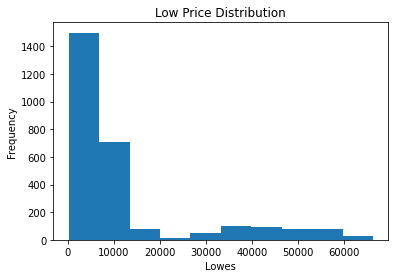

In [ ]:
# histogram of the low price column
# extracting the column as a series object
# and then calling the plot.hist function
ax = df["Low"].plot.hist()

ax.set_title("Low Price Distribution")
ax.set_xlabel("Lowes")
plt.show()

In [ ]:
# Making more attributes for easier organization of data

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.strftime("%Y")

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.strftime("%Y-%m")

df_byyear = df.groupby(by="Year").mean()
df_bymonth = df.groupby(by="Month").mean()

df.groupby(by="Month").mean()


,Open,High,Low,Close,Adj Close,Volume
Month,,,,,,
2014-09,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11,364.850235,376.494235,357.241832,366.099799,366.099799,2.199111e+07
2014-12,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2021-11,60857.520314,62046.720704,59290.196615,60621.488803,60621.488803,3.510901e+10
2021-12,49670.411795,50722.471019,48108.254915,49263.209174,49263.209174,3.087249e+10
2022-01,41368.073463,42044.166332,40176.096396,41114.422380,41114.422380,2.980578e+10


In [ ]:
df_bymonth.axes[0]

Index(['2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', 

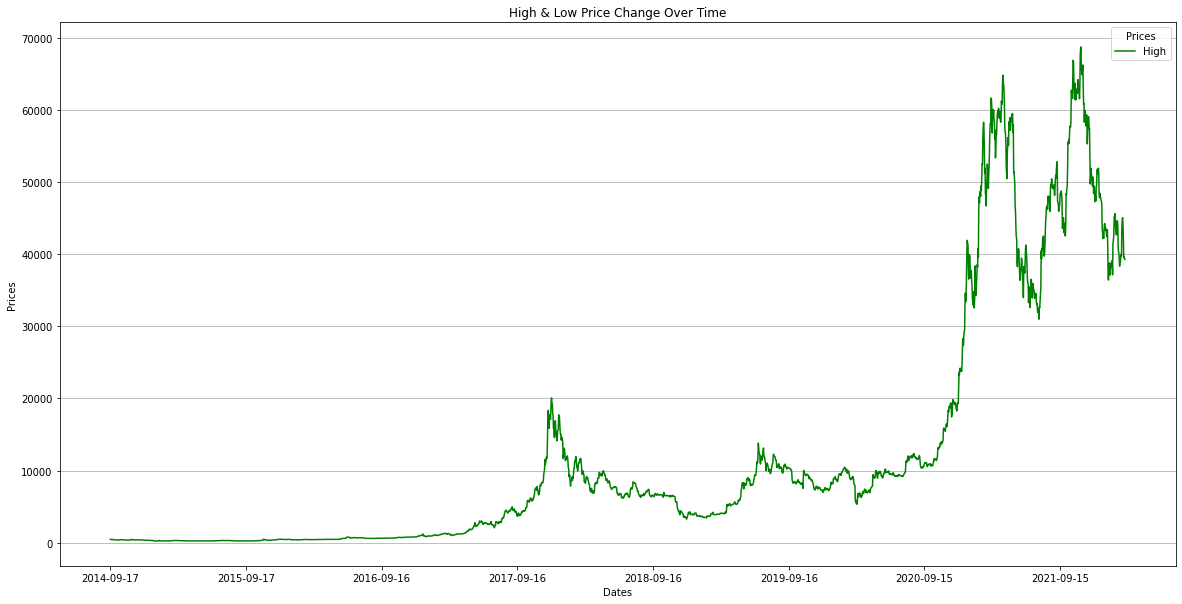

In [ ]:
# Analysis of high price change over 8 years
# Using lineplot to visualize high prices respect to time

plt.figure(figsize= (20,10))
legend_high = "High"

high = plt.plot(df["Date"],df["High"],color="green",label=legend_high )
plt.legend(title="Prices", loc="upper right")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("High & Low Price Change Over Time")
#plt.xticks(range(0,len(df_byyear.axes[0])),df_byyear.axes[0],fontsize=0)
plt.xticks(df["Date"][::365])
plt.grid(axis = "y")
plt.show()

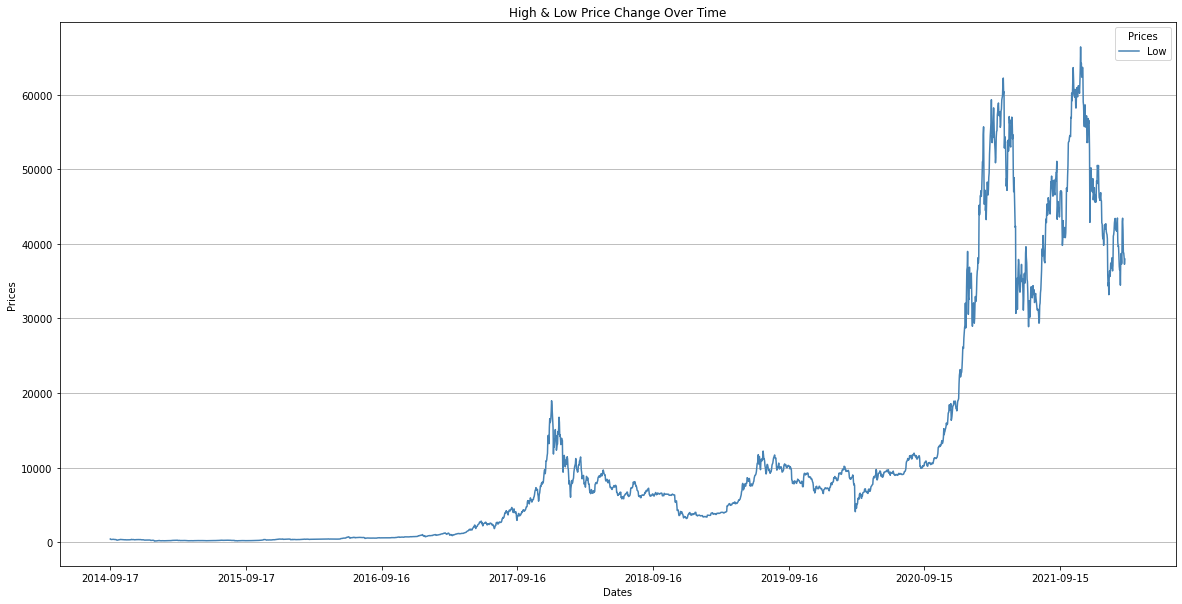

In [ ]:
# Analysis of low price change over 8 years
# Using lineplot to visualize low prices respect to time

plt.figure(figsize= (20,10))
legend_low = "Low"

low = plt.plot(df["Date"],df["Low"],color="steelblue",label=legend_low)

plt.legend(title="Prices", loc="upper right")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("High & Low Price Change Over Time")
#plt.xticks(np.linspace(0,len(df["Date"]),len(df_byyear.axes[0])),df_byyear.axes[0],fontsize=10)
plt.xticks(df["Date"][::365])
plt.grid(axis = "y")
plt.show()

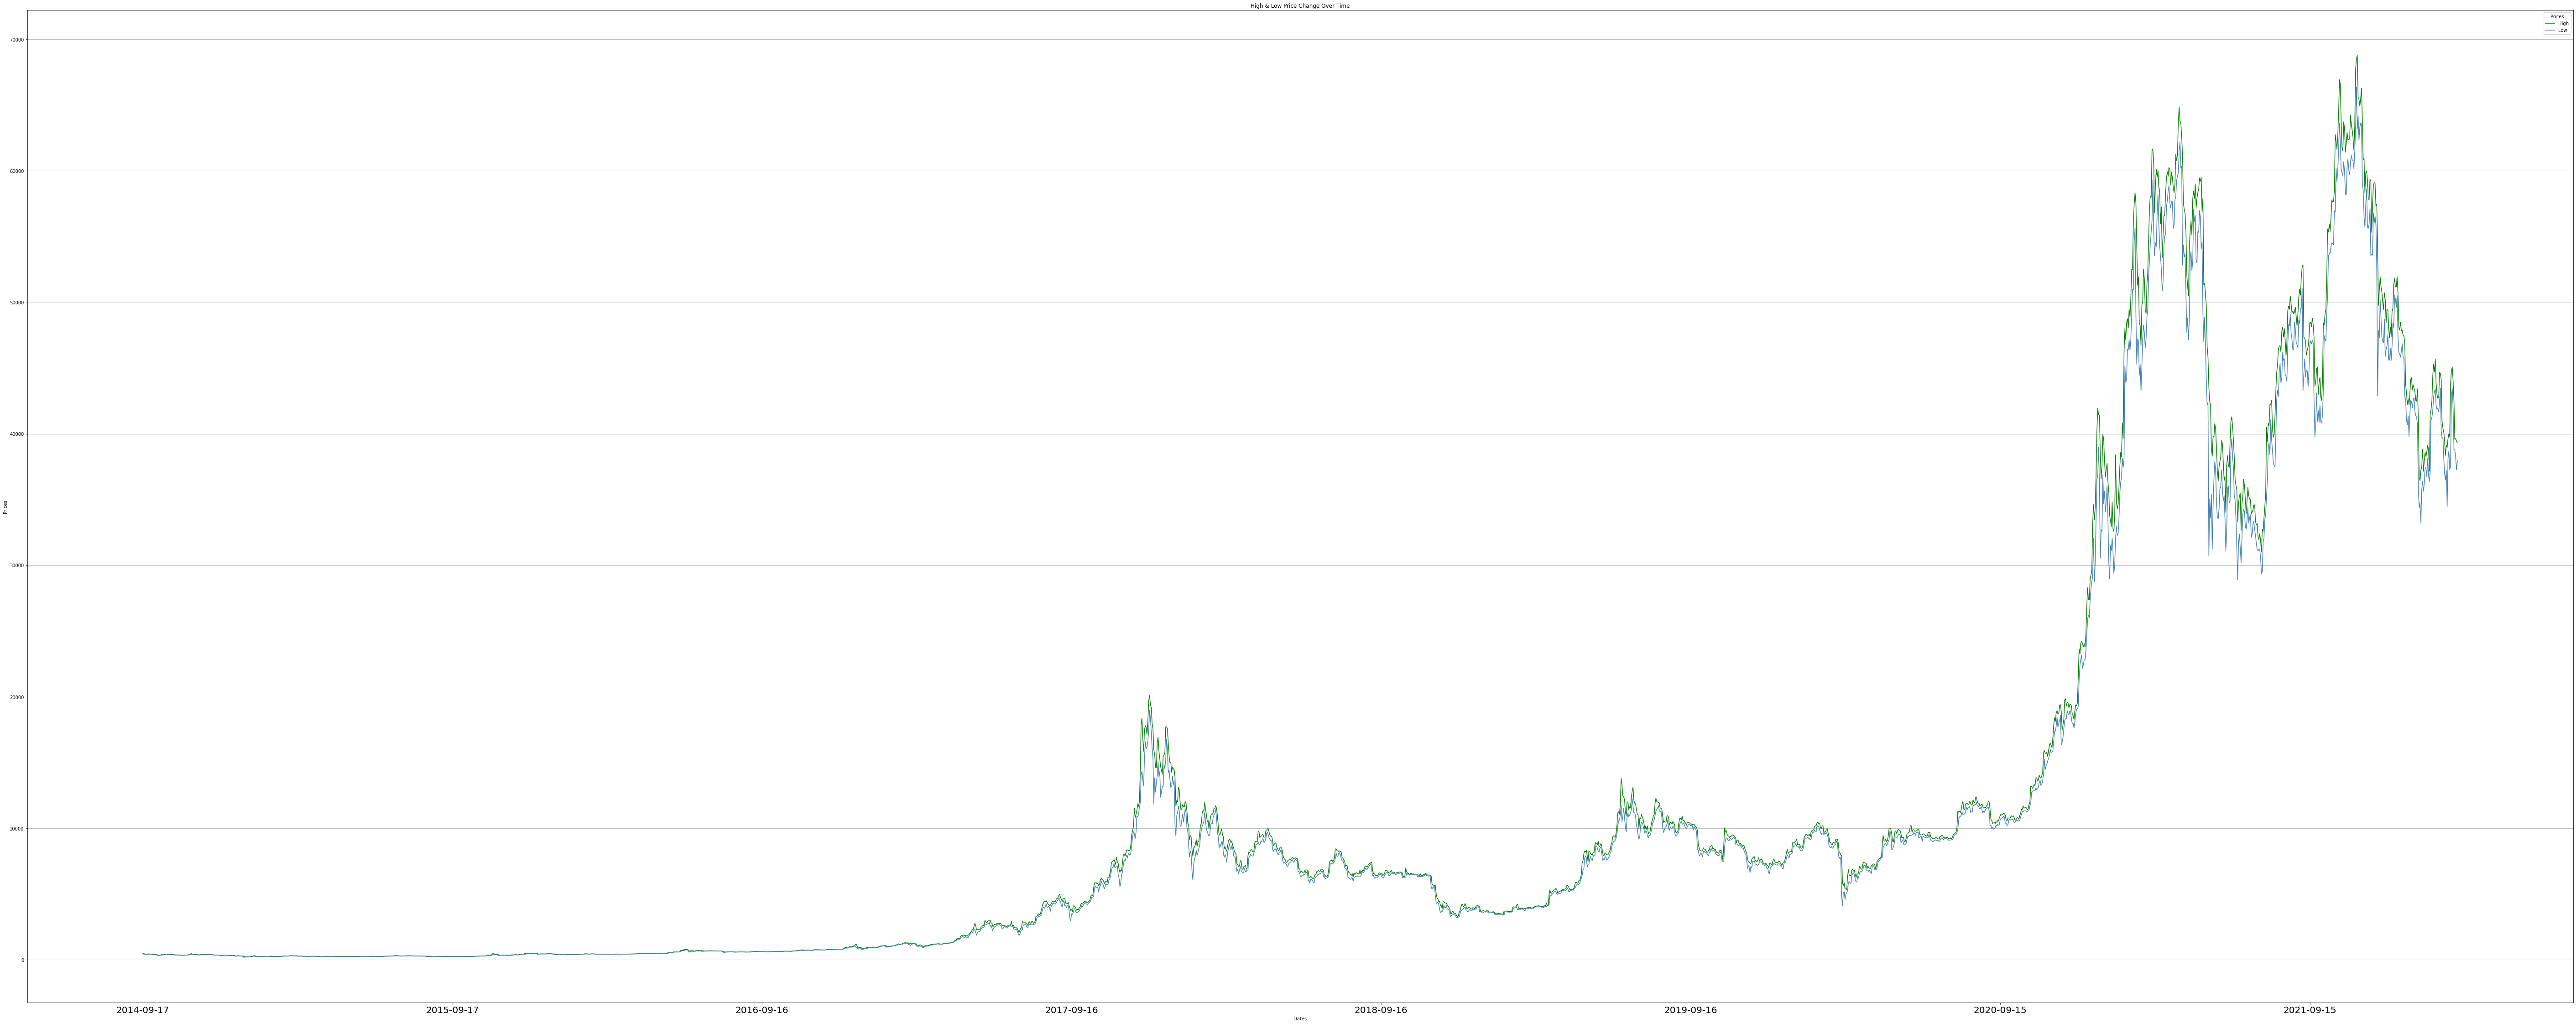

In [ ]:
#Comparison of high and low prices over the 8 years

legend_high = "High"
legend_low = "Low"

plt.figure(figsize= (100,40))

high = plt.plot(df["Date"],df["High"],color="green",label=legend_high )
low = plt.plot(df["Date"],df["Low"],color="steelblue",label=legend_low)

plt.legend(title="Prices", loc="upper right")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("High & Low Price Change Over Time")
#plt.xticks(df_byyear.axes[0],df_byyear.axes[0],fontsize=0)
plt.xticks(df["Date"][::365],fontsize = 20)
plt.grid(axis = "y")
plt.show()

## -	Comparison of open, close, high and low prices for selected time range and/or volume

In [ ]:
# Creating necessary dataset groups for better comparisons

df_year = df.groupby(by="Year")
df_month = df.groupby(by="Month")

df_volume = df.groupby(by="Volume")

df_volume_year = df.groupby(by=["Year","Volume"]).mean()
df_volume_year

Open          High           Low         Close  \
Year Volume                                                                 
2014 5.914570e+06    391.253998    393.938995    386.457001    389.545990   
     6.491650e+06    374.835999    376.291992    373.274994    375.095001   
     7.009320e+06    376.756989    378.447998    370.945007    374.785004   
     7.845880e+06    353.214996    359.984009    352.678986    357.618011   
     8.535470e+06    342.153992    347.032013    342.153992    345.488007   
...                         ...           ...           ...           ...   
2022 4.249468e+10  46458.851560  47406.546880  45752.464840  45897.574220   
     4.301199e+10  40699.605470  41060.527340  35791.425780  36457.316410   
     4.638380e+10  37278.566410  38968.839840  34459.218750  38332.609380   
     4.769114e+10  43946.742190  44278.421880  42447.042970  42591.570310   
     8.419661e+10  43153.570310  43153.570310  41077.445310  41557.902340   

                      Adj Close  
Year Volume                      
2014 5.914570e+06    389.545990  
     6.491650e+06    375.095001  
     7.009320e+06    374.785004  
     7.845880e+06    357.618011  
     8.535470e+06    345.488007  
...                         ...  
2022 4.249468e+10  45897.574220  
     4.301199e+10  36457.316410  
     4.638380e+10  38332.609380  
     4.769114e+10  42591.570310  
     8.419661e+10  41557.902340  

[2730 rows x 5 columns]

In [ ]:
# Selection of time range

print("Please select the type of time range you would like to see: ")
print("1) Yearly")
print("2) Monthly")

range_choice = int(input("Your choice: "))

if range_choice == 1:
  print(df_byyear.index)
  year_choice = input("Please select a year from above list: ")
else:
  print(df_bymonth.index)
  month_choice = input("Please select a month from above list: ")


if range_choice == 1:
  time_range = df_year.get_group(year_choice)
else:
  time_range = df_month.get_group(month_choice)

Please select the type of time range you would like to see: 
1) Yearly
2) Monthly
Your choice: 1
Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object', name='Year')
Please select a year from above list: 2016


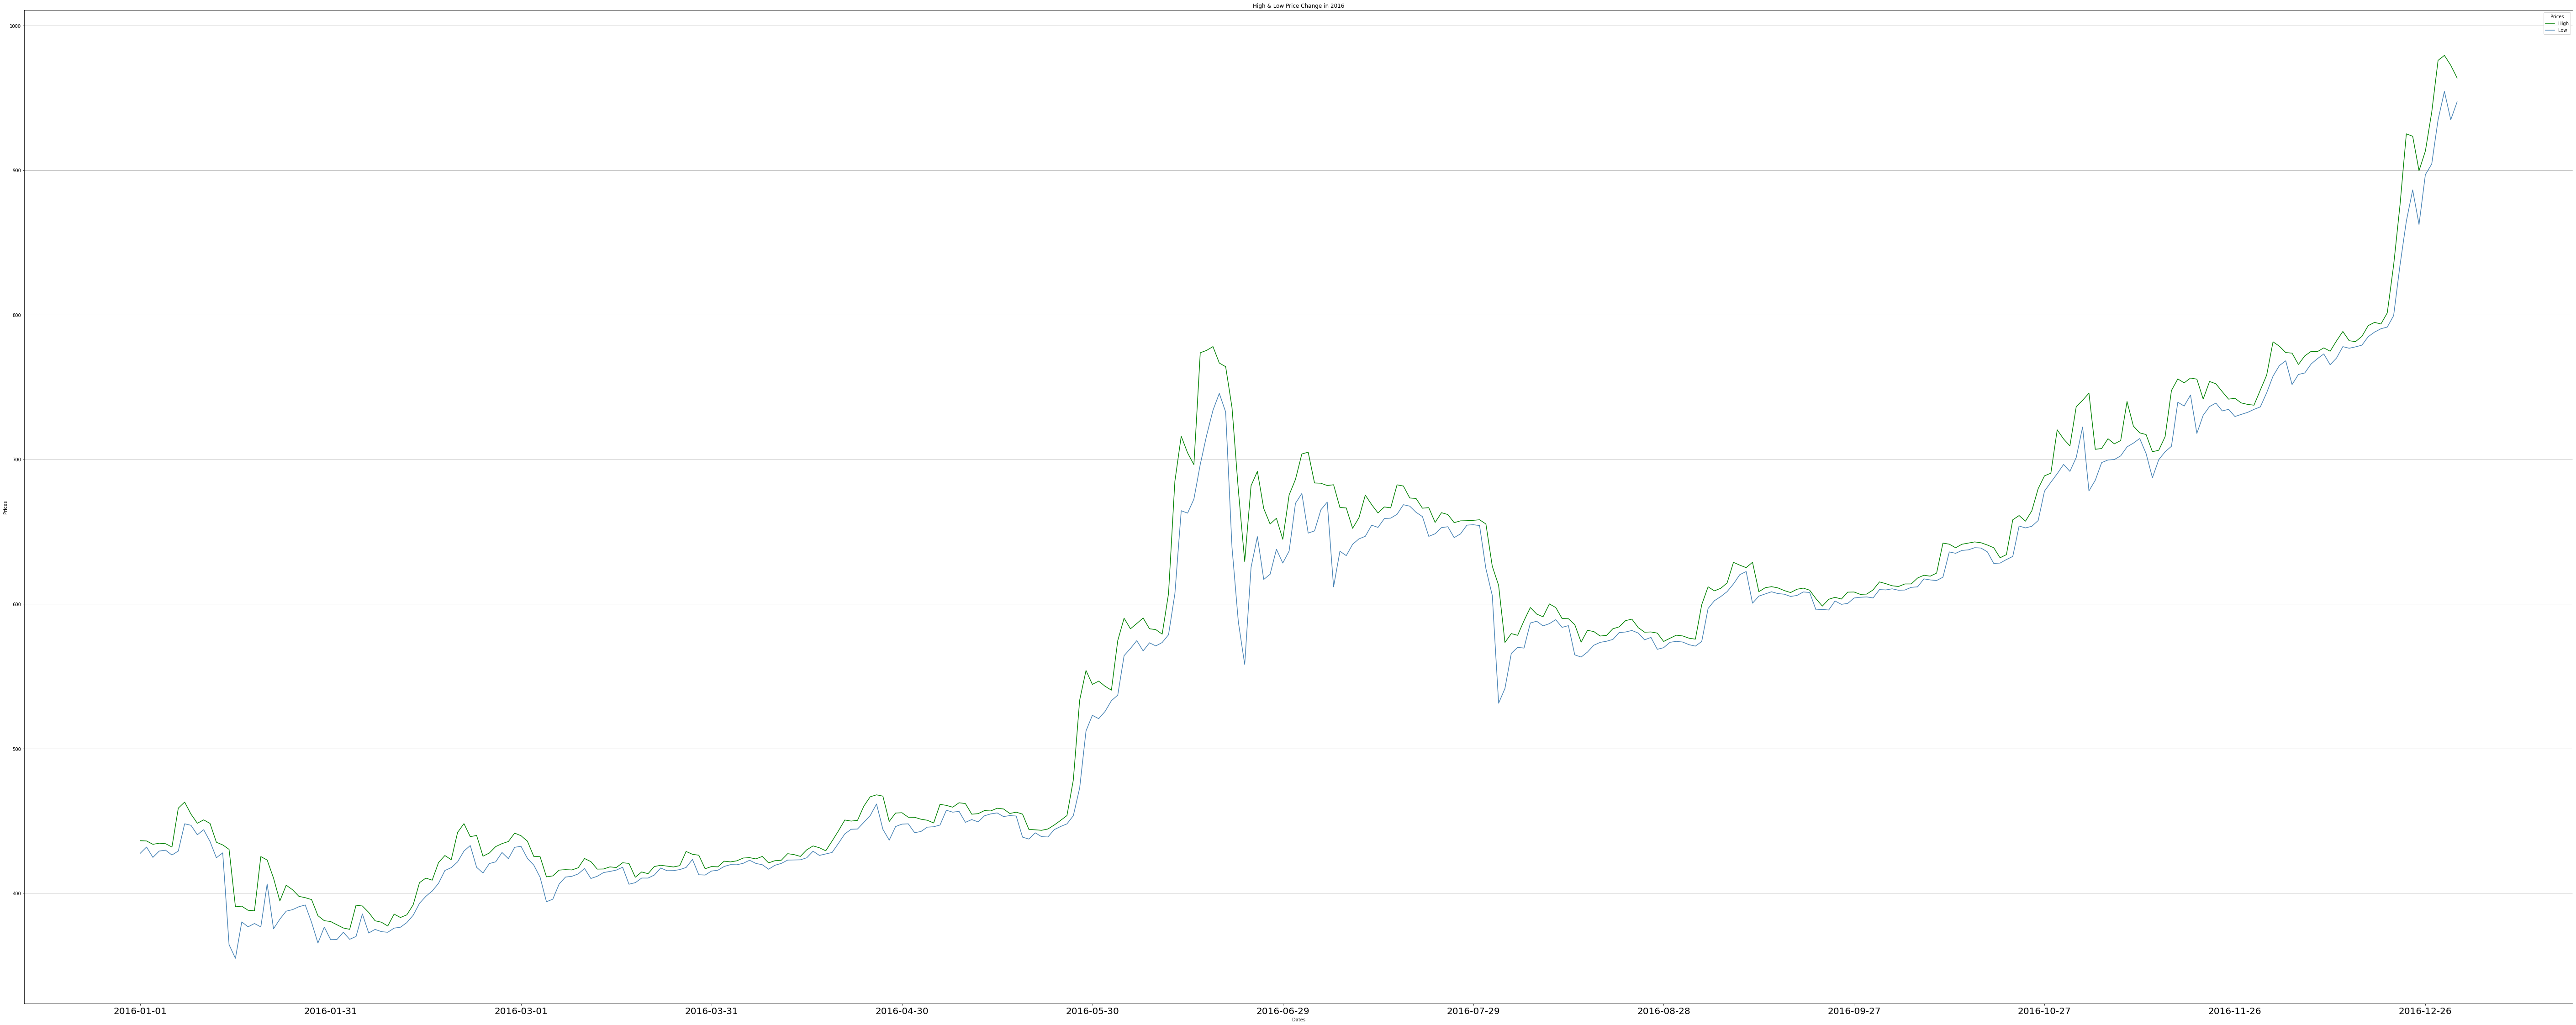

In [ ]:
#Comparison of high and low prices over the 8 years

legend_high = "High"
legend_low = "Low"

plt.figure(figsize= (100,40))

high = plt.plot(time_range["Date"],time_range["High"],color="green",label=legend_high )
low = plt.plot(time_range["Date"],time_range["Low"],color="steelblue",label=legend_low)

plt.legend(title="Prices", loc="upper right")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title(f"High & Low Price Change in {year_choice}")

plt.xticks(time_range["Date"][::30],fontsize = 20)
plt.grid(axis = "y")
plt.show()

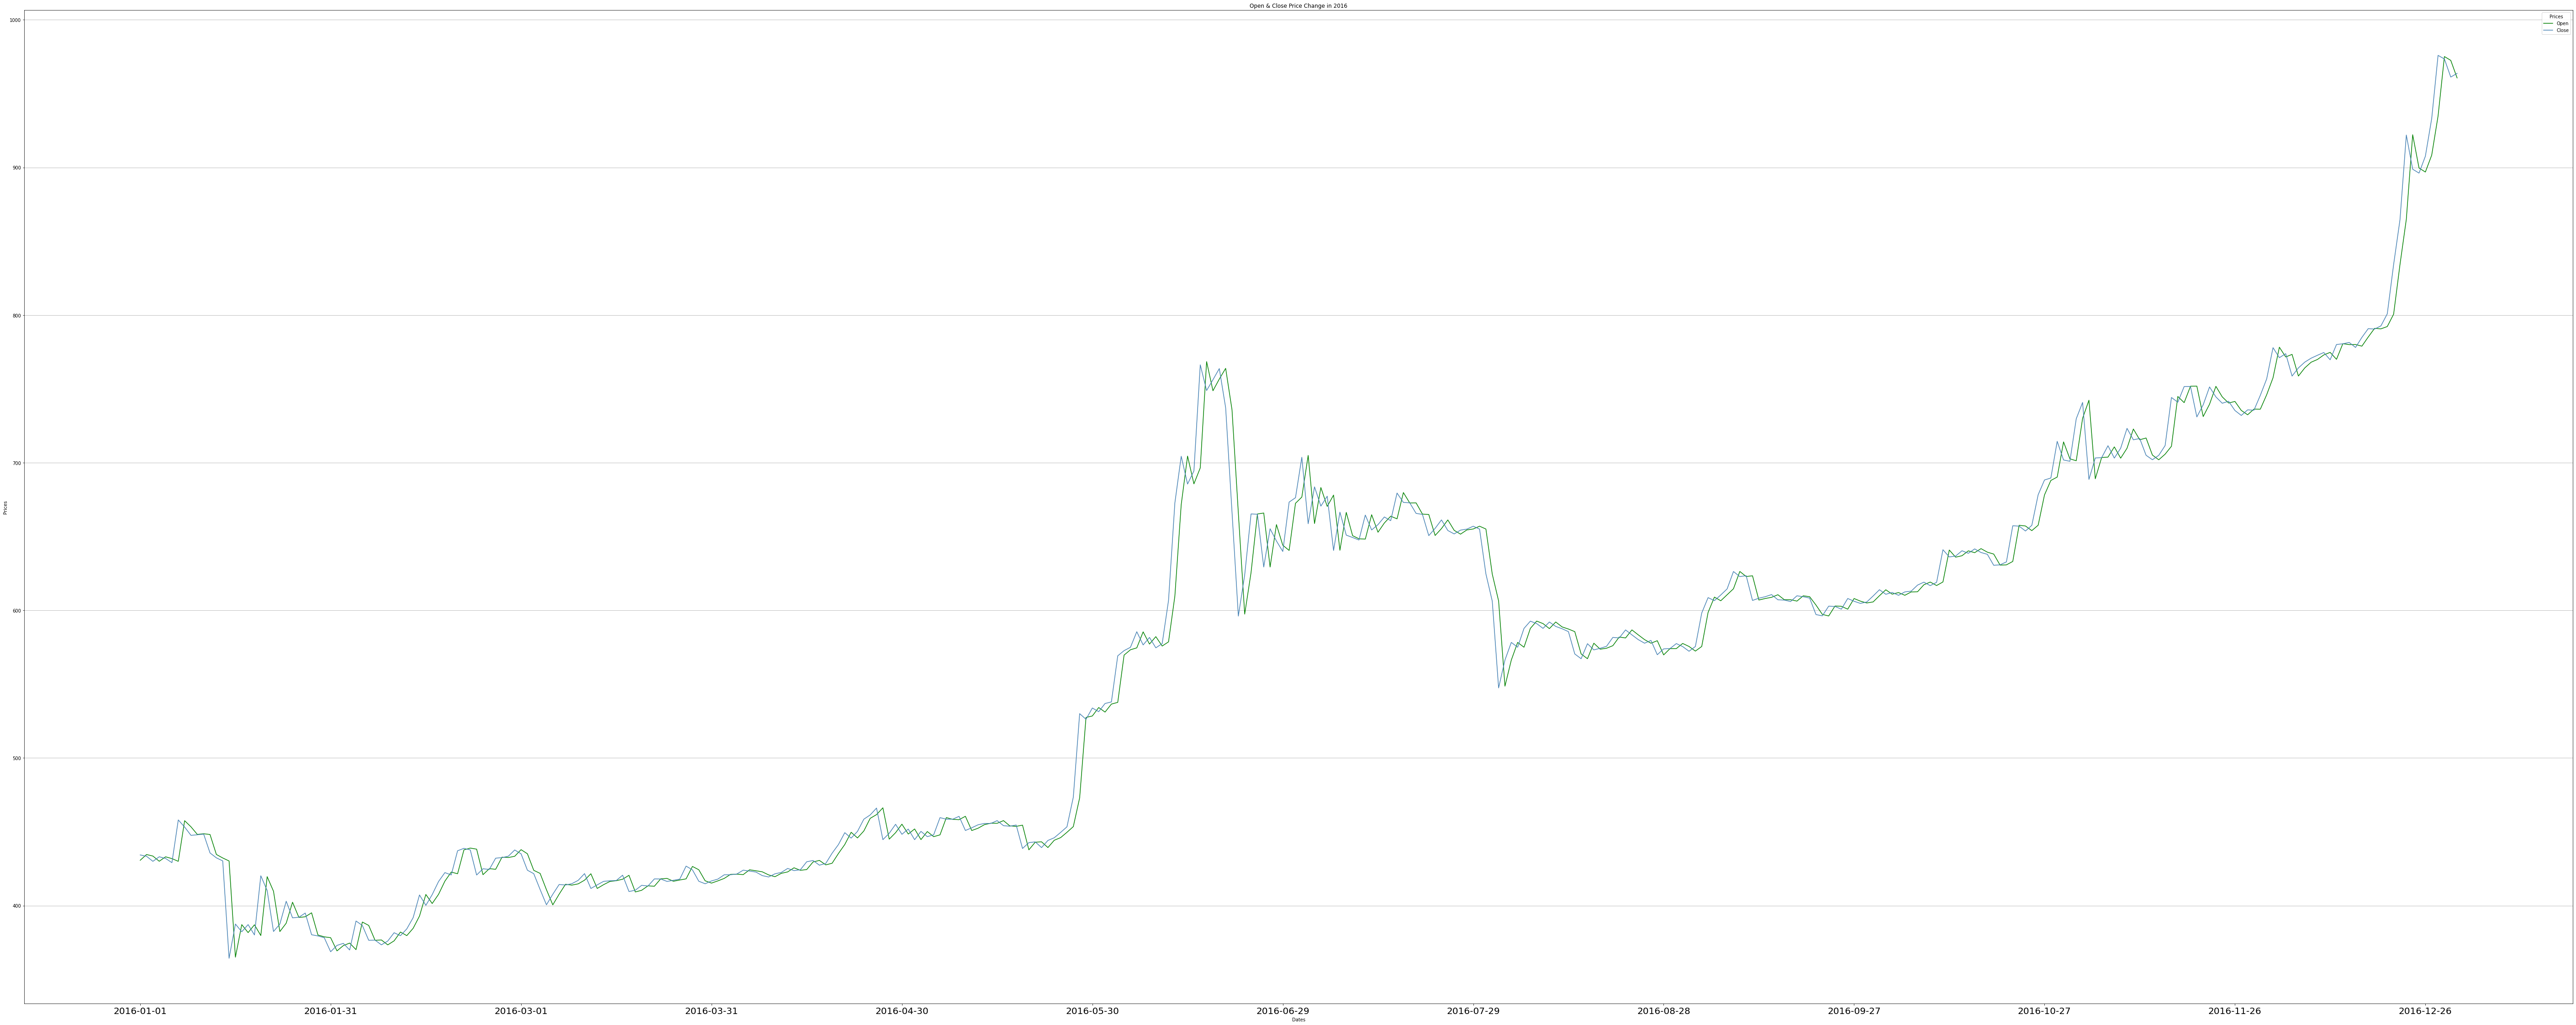

In [ ]:
legend_high = "Open"
legend_low = "Close"

plt.figure(figsize= (100,40))

high = plt.plot(time_range["Date"],time_range["Open"],color="green",label=legend_high )
low = plt.plot(time_range["Date"],time_range["Close"],color="steelblue",label=legend_low)

plt.legend(title="Prices", loc="upper right")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title(f"Open & Close Price Change in {year_choice}")
#plt.xticks(df_byyear.axes[0],df_byyear.axes[0],fontsize=0)
plt.xticks(time_range["Date"][::30],fontsize = 20)
plt.grid(axis = "y")
plt.show()

Introduction of New Features and Their Visualization

We used the data set gathered from the links below;

https://www.kaggle.com/mczielinski/bitcoin-historical-data

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

https://www.kaggle.com/c/bitcoin/data

In [ ]:
from os.path import join

path_prefix = "./drive/MyDrive/cs210"
fname = "coin_Bitcoin.csv"

df=pd.read_csv(join(path_prefix, fname))

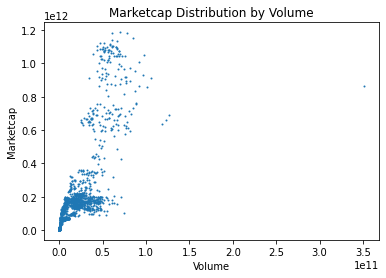

In [ ]:
ax = df[["Marketcap", "Volume"]].plot.scatter(x = "Volume", y = "Marketcap", s = 1)

ax.set_title("Marketcap Distribution by Volume")
ax.set_xlabel("Volume")
plt.show()

In [ ]:
from os.path import join

path_prefix = "./drive/MyDrive/cs210"
fname = "BTC-USD.csv"

df=pd.read_csv(join(path_prefix, fname))

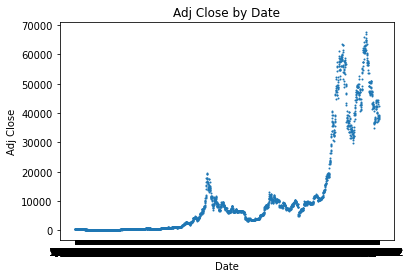

In [ ]:
ax = df[["Adj Close", "Date"]].plot.scatter(x = "Date", y = "Adj Close", s = 1)

ax.set_title("Adj Close by Date")
ax.set_xlabel("Date")
plt.show()

In [ ]:
from os.path import join

path_prefix = "./drive/MyDrive/cs210"
fname = "bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv"

df=pd.read_csv(join(path_prefix, fname))

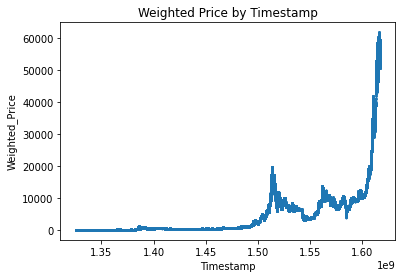

In [ ]:
ax = df[["Weighted_Price", "Timestamp"]].plot.scatter(x = "Timestamp", y = "Weighted_Price", s = 1)

ax.set_title("Weighted Price by Timestamp")
ax.set_xlabel("Timestamp")
plt.show()

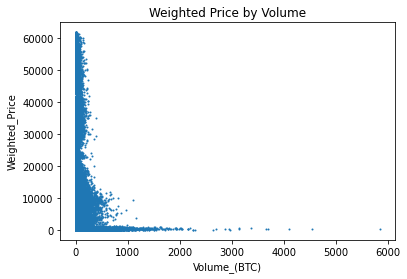

In [ ]:
ax = df[["Weighted_Price", "Volume_(BTC)"]].plot.scatter(x = "Volume_(BTC)", y = "Weighted_Price", s = 1)

ax.set_title("Weighted Price by Volume")
ax.set_xlabel("Volume_(BTC)")
plt.show()